In [1]:
import os.path as op
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from scipy.stats import spearmanr
import pandas as pd
from scipy.ndimage import gaussian_filter1d

In [2]:
subject_ids=['COM013','COM023','COM033','COM040']
groups={
    'COM013': 'ASD',
    'COM023': 'ASD',
    'COM033': 'TD',
    'COM040': 'TD'
}
epoch_types=['STIM','RESP']
condition_names=['SHORT','LONG']

In [3]:
short_color=np.array([255,0,0])/255.0
long_color=np.array([0,0,255])/255.0

In [4]:
all_bursts = {
    'subject_id': [],
    'group': [],
    'epoch_type': [],
    'condition': [],
    'channel': [],
    'trial': [],
    'waveform': np.zeros((0, 156)),
    'waveform_times': [],
    'peak_freq': [],
    'peak_amp_iter': [],
    'peak_amp_base': [],
    'peak_time': [],
    'peak_adjustment': [],
    'fwhm_freq': [],
    'fwhm_time': [],
    'polarity': [],
}

for subject_id in subject_ids:
    group=groups[subject_id]
    
    subject_data_dir=op.join('/home/common/bonaiuto/gogo_bursts/derivatives/processed',group,subject_id)
    fname = op.join(subject_data_dir, f'{subject_id}_bursts.pickle')
    if op.exists(fname):
        with open(fname,'rb') as file:
            bursts=pickle.load(file)
        for key in bursts.keys():
            if key=='waveform_times':
                all_bursts[key] = bursts[key]
            elif key=='waveform':
                all_bursts[key] = np.vstack([all_bursts[key], bursts[key]])
            else:
                all_bursts[key] = np.hstack([all_bursts[key], bursts[key]])

In [5]:
stim_short_idx=np.where((all_bursts['epoch_type']=='STIM') & (all_bursts['condition']=='SHORT'))[0]
stim_long_idx=np.where((all_bursts['epoch_type']=='STIM') & (all_bursts['condition']=='LONG'))[0]
resp_short_idx=np.where((all_bursts['epoch_type']=='RESP') & (all_bursts['condition']=='SHORT'))[0]
resp_long_idx=np.where((all_bursts['epoch_type']=='RESP') & (all_bursts['condition']=='LONG'))[0]

Text(0.5, 0, 'Duration (ms)')

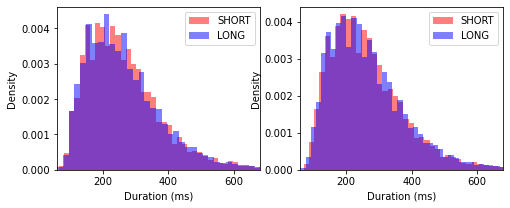

In [6]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['fwhm_time'][stim_short_idx]*1000,
    100,
    alpha=.5,
    label='SHORT',
    density=True,
    color=short_color
)
plt.hist(
    all_bursts['fwhm_time'][stim_long_idx]*1000,
    100,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['fwhm_time']*1000,[0,99]))
plt.ylabel('Density')
plt.xlabel('Duration (ms)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['fwhm_time'][resp_short_idx]*1000,
    100,
    alpha=.5,
    label='SHORT',
    density=True,
    color=short_color
)
plt.hist(
    all_bursts['fwhm_time'][resp_long_idx]*1000,
    100,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['fwhm_time']*1000,[0,99]))
plt.ylabel('Density')
plt.xlabel('Duration (ms)')

Text(0.5, 0, 'Amplitude (fT)')

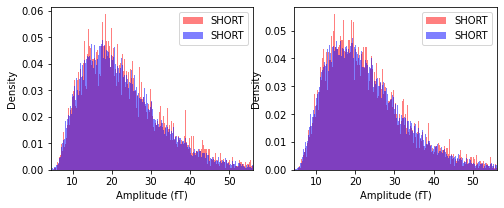

In [8]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['peak_amp_base'][stim_short_idx]*1e15,
    1000,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['peak_amp_base'][stim_long_idx]*1e15,
    1000,
    alpha=.5,
    label='SHORT',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['peak_amp_base']*1e15,[0,99]))
plt.ylabel('Density')
plt.xlabel('Amplitude (fT)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['peak_amp_base'][resp_short_idx]*1e15,
    1000,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['peak_amp_base'][resp_long_idx]*1e15,
    1000,
    alpha=.5,
    label='SHORT',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['peak_amp_base']*1e15,[0,99]))
plt.ylabel('Density')
plt.xlabel('Amplitude (fT)')

Text(0.5, 0, 'Peak frequency (Hz)')

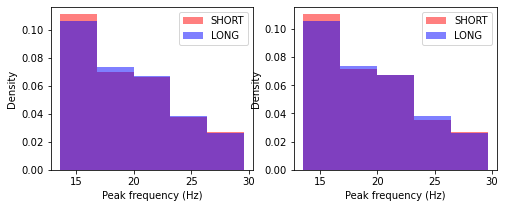

In [9]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['peak_freq'][stim_short_idx],
    5,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['peak_freq'][stim_long_idx],
    5,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.ylabel('Density')
plt.xlabel('Peak frequency (Hz)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['peak_freq'][resp_short_idx],
    5,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['peak_freq'][resp_long_idx],
    5,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.ylabel('Density')
plt.xlabel('Peak frequency (Hz)')

Text(0.5, 0, 'Frequency span (Hz)')

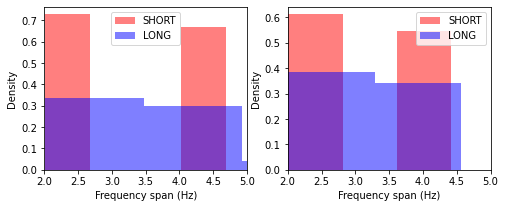

In [10]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['fwhm_freq'][stim_short_idx],
    15,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['fwhm_freq'][stim_long_idx],
    11,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim([2,5])
plt.ylabel('Density')
plt.xlabel('Frequency span (Hz)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['fwhm_freq'][resp_short_idx],
    15,
    alpha=.5,
    label='SHORT',
    density=True, 
    color=short_color
)
plt.hist(
    all_bursts['fwhm_freq'][resp_long_idx],
    11,
    alpha=.5,
    label='LONG',
    density=True,
    color=long_color
)
plt.legend()
plt.xlim([2,5])
plt.ylabel('Density')
plt.xlabel('Frequency span (Hz)')

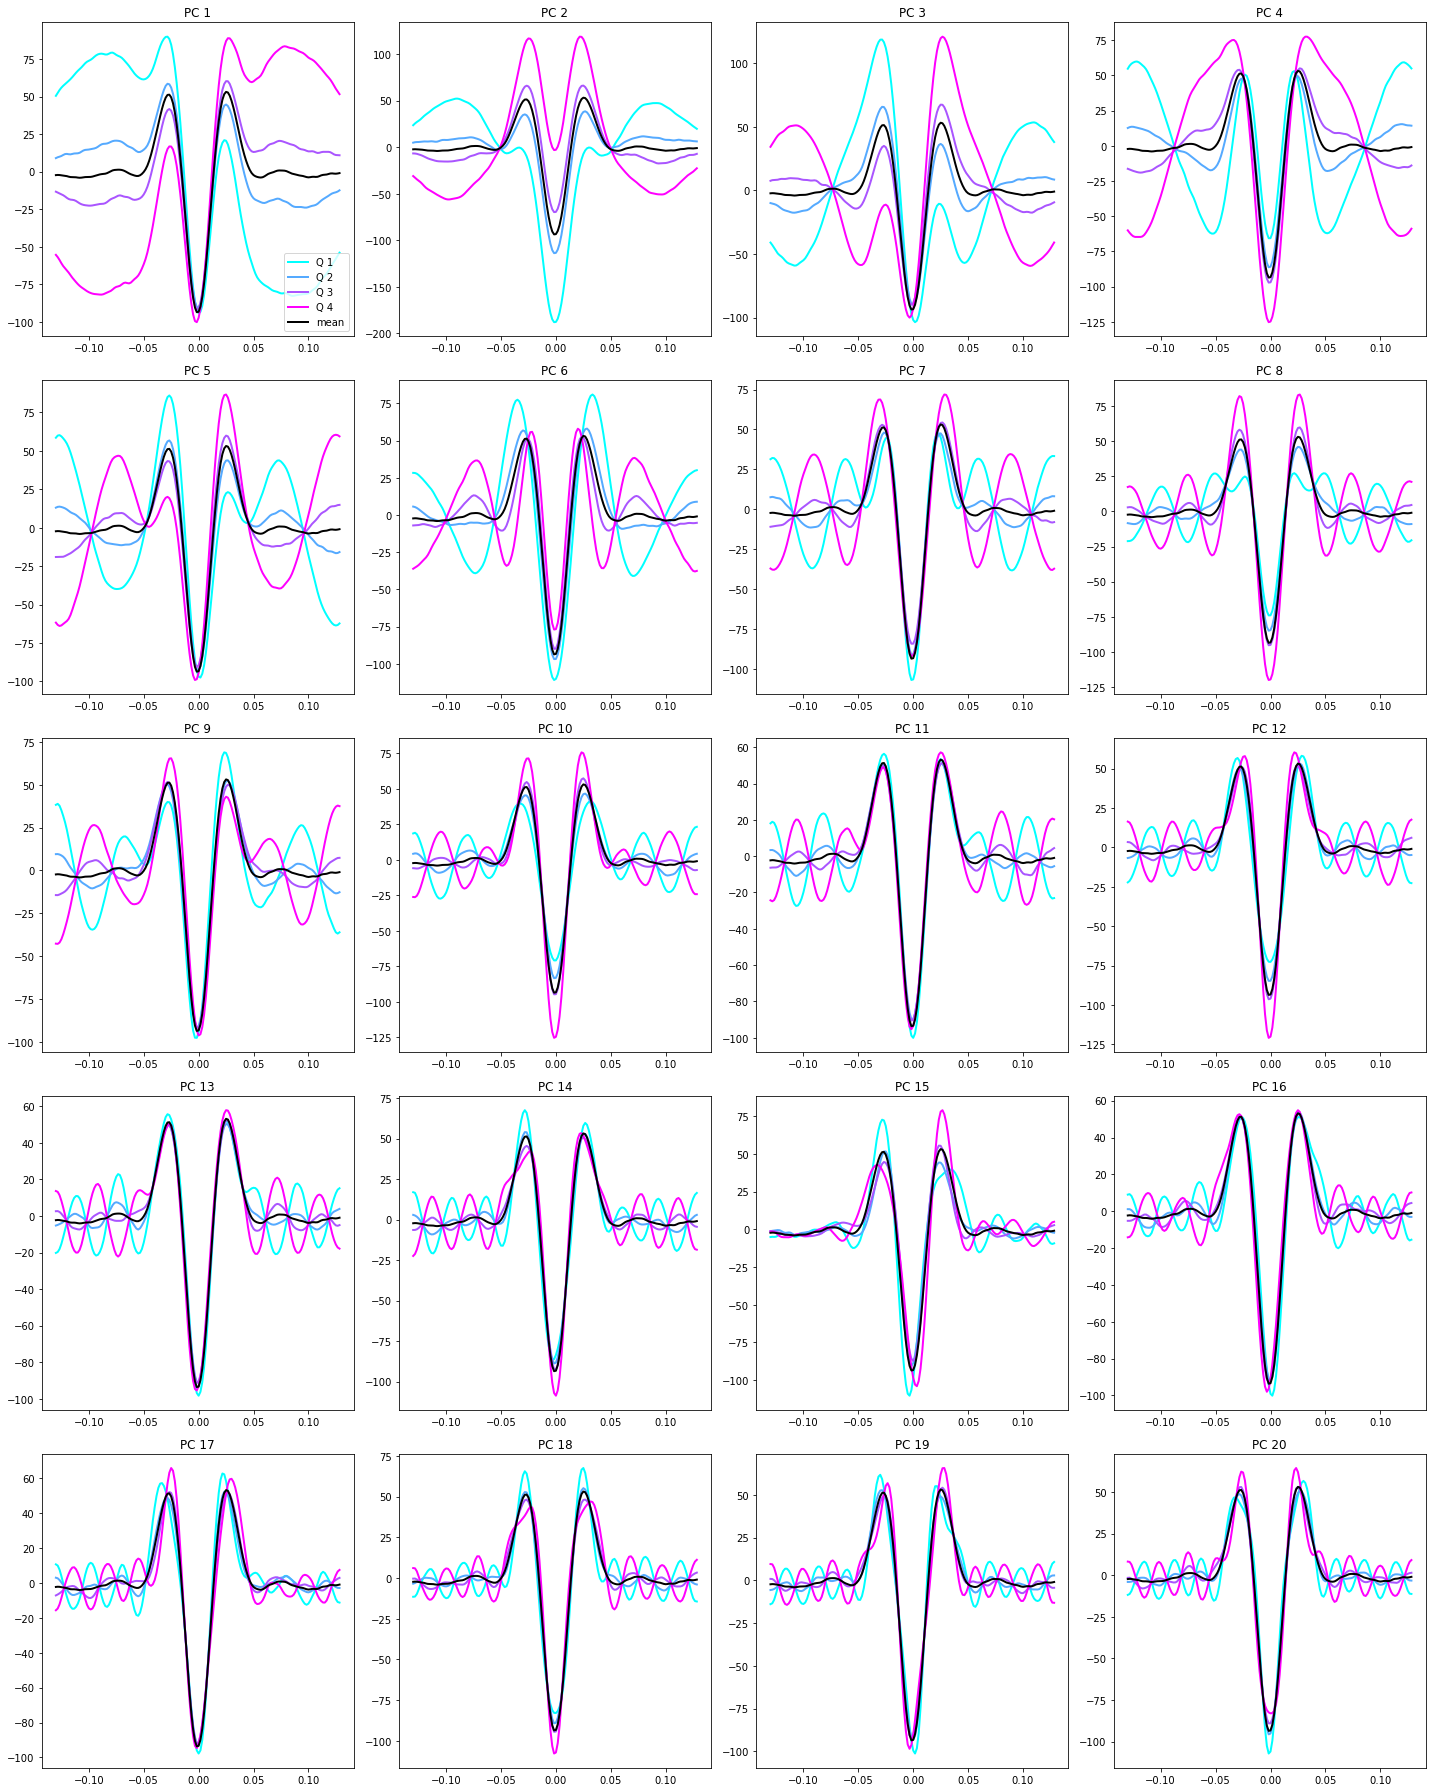

In [12]:
waveforms=all_bursts['waveform']
waveform_times=all_bursts['waveform_times']
model = PCA(n_components=20)
scaler = RobustScaler().fit(waveforms)
burst_std = scaler.transform(waveforms)
model.fit(burst_std)
pc_scores = model.transform(burst_std)  # all the bursts x 20 components
pc_labels = ["PC_{}".format(i+1) for i in range(pc_scores.shape[1])]

quartiles = np.linspace(0, 100, num=5)
quartiles = list(zip(quartiles[:-1], quartiles[1:]))
col_range = plt.cm.cool(np.linspace(0, 1, num=len(quartiles)))
mean_waveform = np.mean(waveforms, axis=0)

f, ax = plt.subplots(5, 4, figsize=(20, 25))
ax = ax.flatten()
for pc_ix, pc in enumerate(pc_labels):
    ax[pc_ix].set_title(pc.replace("_", " "))  # set the nice title
    scores = pc_scores[:,pc_ix]
    q_maps = []
    for q_ix, (b, e) in enumerate(quartiles):
        q_map = (scores > np.percentile(scores, b)) & (scores <= np.percentile(scores, e))  # create a boolean map to select the waveforms
        q_mean = np.mean(waveforms[q_map], axis=0)
        ax[pc_ix].plot(waveform_times, q_mean/1e-15, lw=2, c=col_range[q_ix], label="Q {}".format(q_ix+1))
    ax[pc_ix].plot(waveform_times, mean_waveform/1e-15, lw=2, c="black", label="mean")
ax[0].legend(fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
bin_width = 0.05
time_bins = np.arange(-.5, 1, bin_width)

subject_score_ts={epoch_type: {condition_name: [] for condition_name in condition_names} for epoch_type in epoch_types}
for subject_id in subject_ids:
    for epoch_type in epoch_types:
        for condition_name in condition_names:
            b_idx=(all_bursts['subject_id']==subject_id) & (all_bursts['epoch_type']==epoch_type) & (all_bursts['condition']==condition_name)
            pc_score_ts=[]
            for t_idx in range(len(time_bins)-1):
                st=time_bins[t_idx]
                en=time_bins[t_idx+1]
                bb_idx=b_idx & (all_bursts['peak_time']>=st) & (all_bursts['peak_time']<=en)
                ms=np.nanmean(pc_scores[bb_idx,:],axis=0)
                pc_score_ts.append(ms)
            pc_score_ts=np.array(pc_score_ts)
            pc_score_ts = gaussian_filter1d(pc_score_ts, sigma=1, axis=0, mode="nearest")
            subject_score_ts[epoch_type][condition_name].append(pc_score_ts)
for epoch_type in epoch_types:
    for condition_name in condition_names:
        subject_score_ts[epoch_type][condition_name]=np.array(subject_score_ts[epoch_type][condition_name])

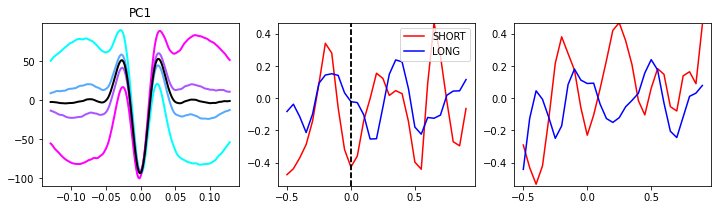

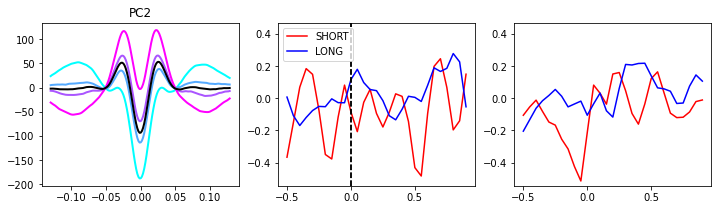

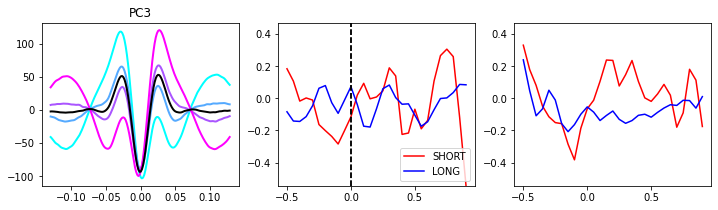

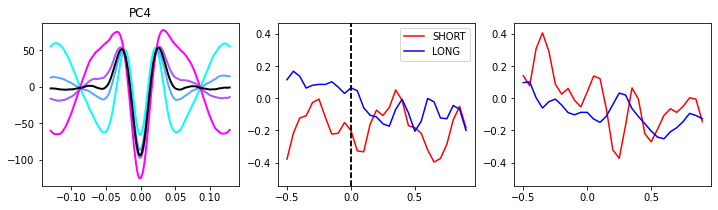

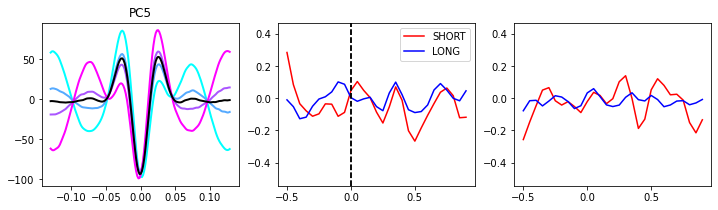

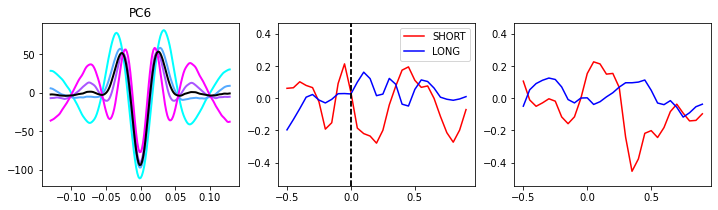

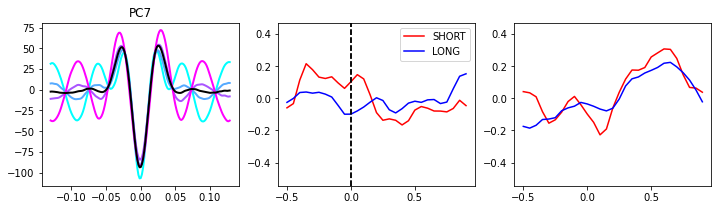

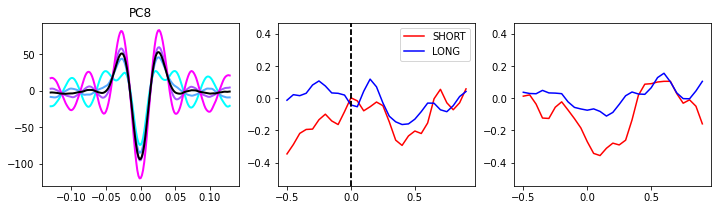

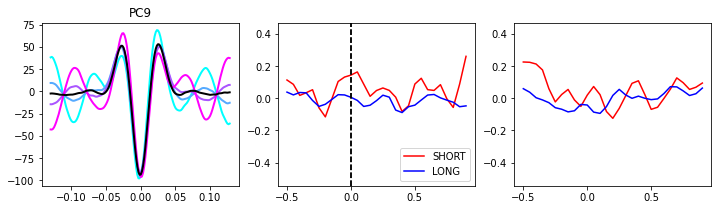

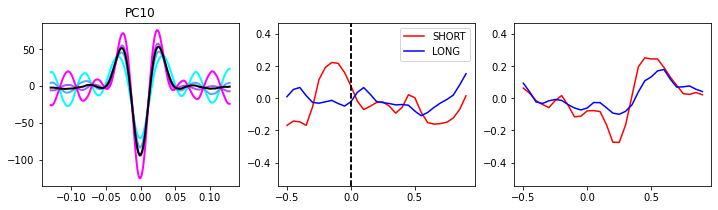

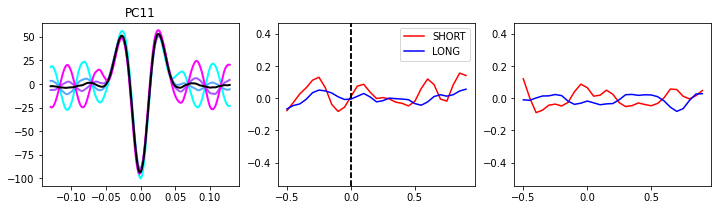

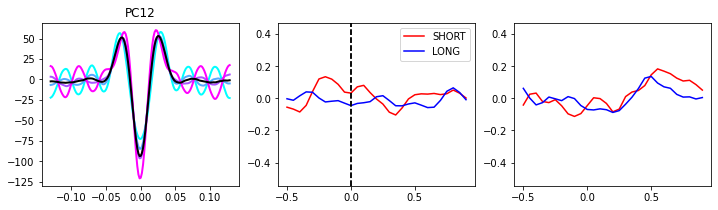

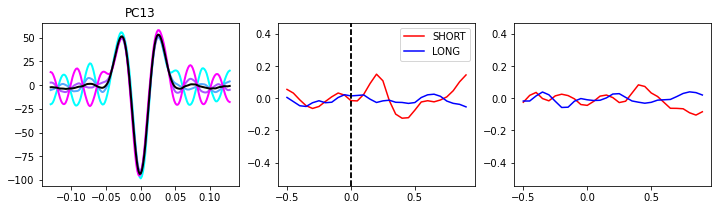

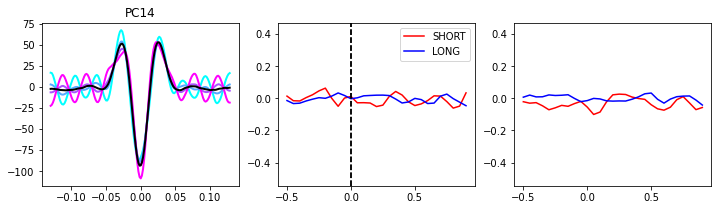

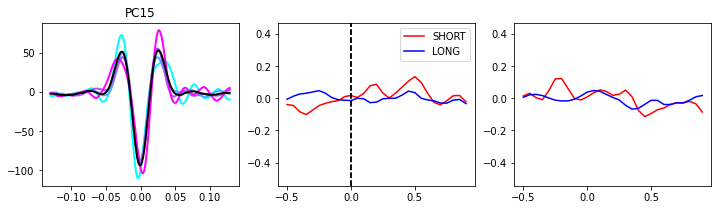

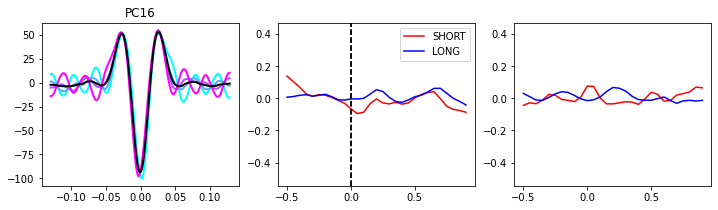

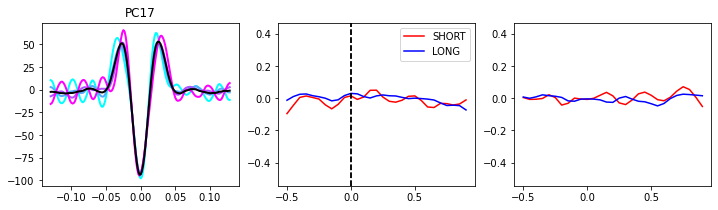

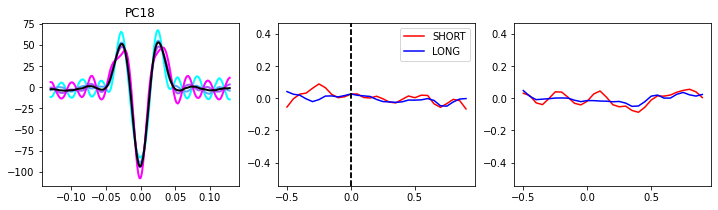

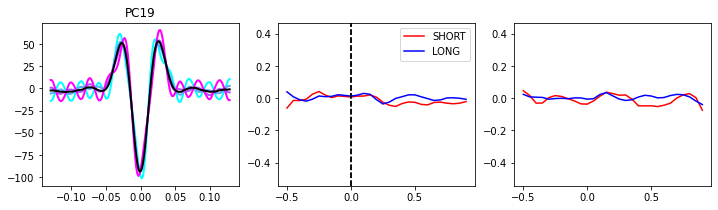

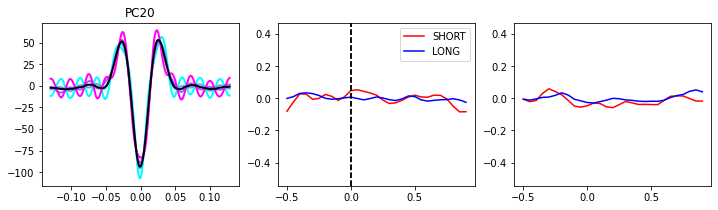

In [18]:
# --- compute global limits across all PCs and conditions ---
all_vals = []
for pc in range(20):
    stim_short = np.nanmean(subject_score_ts['STIM']['SHORT'], axis=0)[:, pc]
    stim_long  = np.nanmean(subject_score_ts['STIM']['LONG'],  axis=0)[:, pc]
    resp_short = np.nanmean(subject_score_ts['RESP']['SHORT'], axis=0)[:, pc]
    resp_long  = np.nanmean(subject_score_ts['RESP']['LONG'],  axis=0)[:, pc]
    all_vals.extend([stim_short, stim_long, resp_short, resp_long])

all_vals = np.concatenate(all_vals)
finite_vals = all_vals[np.isfinite(all_vals)]
ymin, ymax = finite_vals.min(), finite_vals.max()

# --- plotting with fixed limits ---
for pc in range(20):
    plt.figure(figsize=(12,3))

    stim_short = np.nanmean(subject_score_ts['STIM']['SHORT'], axis=0)[:, pc]
    stim_long  = np.nanmean(subject_score_ts['STIM']['LONG'],  axis=0)[:, pc]
    resp_short = np.nanmean(subject_score_ts['RESP']['SHORT'], axis=0)[:, pc]
    resp_long  = np.nanmean(subject_score_ts['RESP']['LONG'],  axis=0)[:, pc]

    ax=plt.subplot(1,3,1)
    ax.set_title(f'PC{pc+1}')  # set the nice title
    scores = pc_scores[:,pc]
    q_maps = []
    for q_ix, (b, e) in enumerate(quartiles):
        q_map = (scores > np.percentile(scores, b)) & (scores <= np.percentile(scores, e))  # create a boolean map to select the waveforms
        q_mean = np.mean(waveforms[q_map], axis=0)
        ax.plot(waveform_times, q_mean/1e-15, lw=2, c=col_range[q_ix], label="Q {}".format(q_ix+1))
    ax.plot(waveform_times, mean_waveform/1e-15, lw=2, c="black", label="mean")
    
    # STIM
    ax1 = plt.subplot(1,3,2)
    ax1.plot(time_bins[:-1], stim_short, label='SHORT', color=short_color)
    ax1.plot(time_bins[:-1], stim_long,  label='LONG', color=long_color)
    ax1.axvline(0,color='k',linestyle='--')
    ax1.set_ylim(ymin, ymax)
    ax1.legend()

    # RESP
    ax2 = plt.subplot(1,3,3)
    ax2.plot(time_bins[:-1], resp_short, label='SHORT', color=short_color)
    ax2.plot(time_bins[:-1], resp_long,  label='LONG', color=long_color)
    ax1.axvline(0,color='k',linestyle='--')
    ax2.set_ylim(ymin, ymax)
